In [0]:
import pandas as pd
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline
import string
import seaborn as sns

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
link_g1 = 'https://drive.google.com/open?id=1bOI0ZAHwJ0iW-7Be79g7q0QSJm-iAZl3' # The shareable link
link_g2 = 'https://drive.google.com/open?id=1srJkLe-lMlPKXIqPxCQIVV8PdguZf1oL'

fluff_1, id_1 = link_g1.split('=')
print(id_1) # Verify that you have everything after '='
fluff_2, id_2 = link_g2.split('=')
print(id_2)

downloaded_g1 = drive.CreateFile({'id':id_1}) 
downloaded_g1.GetContentFile('news_guardian_1.csv')  
g1_df = pd.read_csv('news_guardian_1.csv')

downloaded_g2 = drive.CreateFile({'id':id_2}) 
downloaded_g2.GetContentFile('news_guardian_2.csv')  
g2_df = pd.read_csv('news_guardian_2.csv')

# Dataset is now stored in a Pandas Dataframe



1bOI0ZAHwJ0iW-7Be79g7q0QSJm-iAZl3
1srJkLe-lMlPKXIqPxCQIVV8PdguZf1oL


In [0]:
def read_df(link, name, column):
  
  fluff, id = link.split('=')
  print (id) # Verify that you have everything after '='
  downloaded = drive.CreateFile({'id':id}) 
  downloaded.GetContentFile(name)  
  df = pd.read_csv(name)
  df.drop_duplicates(subset=column, inplace=True)
  df.reset_index(inplace=True)
  
  return df

In [5]:
dailymail = read_df("https://drive.google.com/open?id=1AEYsszgTZAUO5DXPnKxCSmmSxosJNpSi", "dailymail.csv", "URL")
business = read_df("https://drive.google.com/open?id=19rkBsAybTHw6dDEcRItirqw4_rUgQNSr", "business_scrap.csv", "URL")
financialexpress = read_df("https://drive.google.com/open?id=1ST874ZAQ614Iqcv807PCLnhfrysojHuJ", "financialexpress.csv", "URL")
bing = read_df("https://drive.google.com/open?id=19E5Qt6H7tI86L91rSDn6m7ozknzkNph9", "news_Bing.csv", "url")
kitco = read_df("https://drive.google.com/open?id=1f-qntO0mvZFWWbsgo487cvn_PZpQlEas", "news_kitco.csv", "url")
thehill = read_df("https://drive.google.com/open?id=1tHUK_JID7vqGRmNNw5gYObZqxsxvDRvl", "news_thehill.csv", "url")
washington = read_df("https://drive.google.com/open?id=1LpFUQTFyWbZ1_IVs5AcLedywtMaIncvq", "news_washington.csv", "url")
cnbc = read_df("https://drive.google.com/open?id=1q-I8rWpJfIUZryUqdCfr9QxdQULNNrEe", "cnbc_web.csv", "URL")
mix = read_df("https://drive.google.com/open?id=1LDxH_mvG-doNFkAX8hiVfjdsRbtyRoJn", "thisismoney+bnnbloomberg.csv", "docid")

1AEYsszgTZAUO5DXPnKxCSmmSxosJNpSi
19rkBsAybTHw6dDEcRItirqw4_rUgQNSr
1ST874ZAQ614Iqcv807PCLnhfrysojHuJ
19E5Qt6H7tI86L91rSDn6m7ozknzkNph9
1f-qntO0mvZFWWbsgo487cvn_PZpQlEas
1tHUK_JID7vqGRmNNw5gYObZqxsxvDRvl
1LpFUQTFyWbZ1_IVs5AcLedywtMaIncvq
1q-I8rWpJfIUZryUqdCfr9QxdQULNNrEe
1LDxH_mvG-doNFkAX8hiVfjdsRbtyRoJn


In [0]:
g1_df = g1_df.rename(columns = {'url': 'URL', 'content': 'text', 'timestamp': 'publish_date'})
g2_df = g2_df.rename(columns = {'url': 'URL', 'content': 'text', 'timestamp': 'publish_date'})

In [0]:
mix['publish_date'] = pd.to_datetime(mix.year*10000+mix.month*100+mix.day,format='%Y%m%d')

In [0]:
dailymail = dailymail[["URL", "text", "publish_date"]]
business = business[["URL", "content", "publish_date"]]
financialexpress = financialexpress[["URL", "text", "publish_date"]]
kitco = kitco[["url", "text", "date"]]
thehill = thehill[["url", "text", "date"]]
washington = washington[["url", "text", "date"]]
g1_df = g1_df[["URL", "text", "publish_date"]]
g2_df = g2_df[["URL", "text", "publish_date"]]
cnbc = cnbc[["URL", "content", "PUBLISHED_TIME"]]
mix = mix[["docid", "content", "publish_date"]]

In [0]:
thisismoney = mix[mix.loc[:,'content'].str[0:11]!='(Bloomberg)'].reset_index(drop=True)
bloomberg = mix[mix.loc[:,'content'].str[0:11]=='(Bloomberg)'].reset_index(drop=True)

In [0]:
guardian_news = pd.concat([g1_df, g2_df])
guardian_news = guardian_news[~guardian_news['text'].isna()]


In [0]:
guardian_news_filtered = guardian_news[guardian_news['text'].str.contains("tariff")]

In [0]:
business.columns = ["URL", "text", "publish_date"]
financialexpress.columns = ["URL", "text", "publish_date"]
kitco.columns = ["URL", "text", "publish_date"]
thehill.columns = ["URL", "text", "publish_date"]
washington.columns = ["URL", "text", "publish_date"]
cnbc.columns = ["URL", "text", "publish_date"]
thisismoney.columns = ["URL", "text", "publish_date"]
bloomberg.columns = ["URL", "text", "publish_date"]

In [13]:
dailymail['source'] = 'Daily Mail'
business['source'] = 'Business Finance'
financialexpress['source'] = 'Financial Express'
kitco['source'] = 'Kitco'
thehill['source'] = 'The Hill'
washington['source'] = 'Washington'
guardian_news_filtered['source'] = 'Guardian'
cnbc['source'] = "CNBC"
thisismoney['source'] = "This Is Money"
bloomberg['source'] = "Bloomberg"


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [0]:
alldata = pd.concat([dailymail, business, financialexpress, kitco, thehill, washington, guardian_news_filtered], sort=False, ignore_index=True)

In [15]:
alldata.head()

,URL,text,publish_date,source
0,https://www.dailymail.co.uk/news/article-30885...,Bobbies on the beat are an ‘endangered species...,2015-05-20 00:03:48+01:00,Daily Mail
1,https://www.dailymail.co.uk/wires/reuters/arti...,"BEIJING, May 27 (Reuters) - Profits for China'...",2019-05-27 03:18:41+01:00,Daily Mail
2,https://www.dailymail.co.uk/wires/reuters/arti...,"By Stella Qiu and Kevin Yao\n\nBEIJING, July 1...",2019-07-10 03:44:25+01:00,Daily Mail
3,http://www.dailymail.co.uk/news/article-598678...,Riders with Uber are being taken for a ride wh...,2018-07-24 15:55:38+01:00,Daily Mail
4,https://www.dailymail.co.uk/news/article-68079...,Advertisement\n\nDonald Tusk today revealed he...,2019-03-14 09:31:55+00:00,Daily Mail


In [16]:
#number of broken links
sum(alldata['text'].isna())

12

In [17]:
alldata.shape

(13821, 4)

In [0]:
#clean news
alldata = alldata[alldata.loc[:,'URL'].str[0:4]=='http'].reset_index(drop=True)
alldata = pd.concat([alldata, thisismoney, bloomberg], sort=False, ignore_index=True)
#remove rows with broken links
all_data = alldata[~alldata['text'].isna()]

In [19]:
#combine all news
news_all = " ".join(oneNews for oneNews in all_data.text)
print ("There are {} articles in the combination of all news.".format(len(all_data)))

There are 15867 articles in the combination of all news.


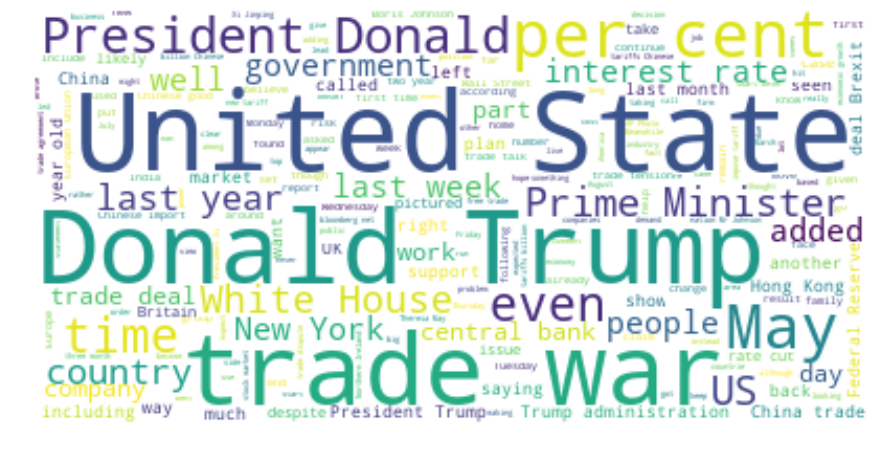

In [20]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["will", "say", "said", "one", "many",
                  "yet", "come", "need", "make", "made",
                 "says", "see", "thing", "think", "look",
                  "read", "going", "Facebook Twitter Pinterest",
                 "now", "still", "today"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(news_all)

# Display the generated image
plt.figure(figsize = (15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Word Cloud by Source

In [0]:
def create_word_cloud(news_data, source_name):
  """
  input: 
    news_data - dataframe for all data
    source_name - string for source name
  """
  
  # Select one source:
  sub_df = news_data[news_data.source == source_name]
  
  #combine all news
  sub_news = " ".join(oneNews for oneNews in sub_df.text)

  
  # Create stopword list:
  stopwords = set(STOPWORDS)
  stopwords.update(["will", "say", "said", "one", "many",
                    "yet", "come", "need", "make", "made",
                   "says", "see", "thing", "think", "look",
                    "read", "going", "Facebook Twitter Pinterest",
                   "now", "still", "today", source_name])

  # Generate a word cloud image
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(sub_news)

  # Display the generated image
  plt.figure(figsize = (15, 10))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.title("Word cloud for " + source_name)
  plt.axis("off")
  plt.show()
  
  

In [0]:
for source in all_data.source.unique():
  create_word_cloud(all_data, source)

Output hidden; open in https://colab.research.google.com to view.

### Word Frequency

In [0]:
import re
import os
import nltk
#import textract
import collections
from collections import Counter
from nltk import bigrams
from nltk import trigrams
#Use tweet tokenizer to prevent contracted words from spliting
from nltk.tokenize import TweetTokenizer

In [0]:
def remove_punctuation(text):
    """
    Removes all punctuation and conotation from the string and returns a 'plain' string
    """
    punctuation2 = '-&'+'®©™€â´‚³©¥ã¼•ž®è±äüöž!@#Â“§$%^\'’*()î_+€$=¿{”}[]:«;"»\â¢|<>,.?/~`0123456789'
    for sign in punctuation2:
        text = text.replace(sign, " ")
    return text
def remove_stopwords(text):
    stopwords = set(STOPWORDS)
    stopwords.update(["will", "say", "said", "one", "many",
                  "yet", "come", "need", "make", "made",
                 "says", "see", "thing", "think", "look",
                  "read", "going"])
    text_list = text.split()
    text_list = [item for item in text_list if item not in stopwords]
    text_list = [item for item in text_list if len(item) > 1]
    text_list = " ".join(str(t) for t in text_list)
    return text_list
text_string = news_all.lower()

rp_news_all= remove_punctuation(text_string)
rs_news_all = remove_stopwords(rp_news_all)

tknzr = TweetTokenizer()
tokens = tknzr.tokenize(rs_news_all)
unigrams = {}
for token in tokens:
  if token not in unigrams:
    unigrams[token] = 1
  else:
    unigrams[token] += 1
bi_tokens = Counter(bigrams(tokens))
tri_tokens = Counter(trigrams(tokens))

In [0]:
def get_tokens(cleaned_text):
  """
  input: 
    cleaned_text: string of combined_news
  """
  
  text_string = cleaned_text.lower()

  rp_news_all= remove_punctuation(text_string)
  rs_news_all = remove_stopwords(rp_news_all)

  tknzr = TweetTokenizer()
  tokens = tknzr.tokenize(rs_news_all)
  unigrams = {}
  for token in tokens:
    if token not in unigrams:
      unigrams[token] = 1
    else:
      unigrams[token] += 1
  bi_tokens = Counter(bigrams(tokens))
  tri_tokens = Counter(trigrams(tokens))
  
  return bi_tokens, tri_tokens

In [0]:
def get_word_phrases(bi_tokens, tri_tokens):
  bi = collections.OrderedDict(bi_tokens.most_common())
  tri = collections.OrderedDict(tri_tokens.most_common())

  bi_df = pd.DataFrame.from_dict(bi, orient='index').reset_index()
  bi_df = bi_df.rename(columns={'index':'2 Words Phrase', 0:'Count'})

  tri_df = pd.DataFrame.from_dict(tri, orient='index').reset_index()
  tri_df = tri_df.rename(columns={'index':'3 Words Phrase', 0:'Count'})

  return bi_df, tri_df

In [0]:
def plot_bi_word_count(bi_df, num_words=30, plot_source='All Sources'):
  
  """
  input: 
    - bi_df: dataframe of 2-word phrases
    - num_words: number of phrases to plot
  
  """
  sns.set(font_scale=2)
  plt.figure(figsize = (30, 20))
  plt.title('2-Word Phrases from ' + plot_source)
  sns.barplot(y = '2 Words Phrase', x = 'Count', data = bi_df.iloc[1:num_words])

def plot_tri_word_count(bi_df, num_words=30, plot_source='All Sources'):
  
  """
  input: 
    - bi_df: dataframe of 2-word phrases
    - num_words: number of phrases to plot
  
  """
  sns.set(font_scale=2)
  plt.figure(figsize = (30, 20))
  plt.title('3-Word Phrases from ' + plot_source)
  sns.barplot(y = '3 Words Phrase', x = 'Count', data = bi_df.iloc[1:num_words])



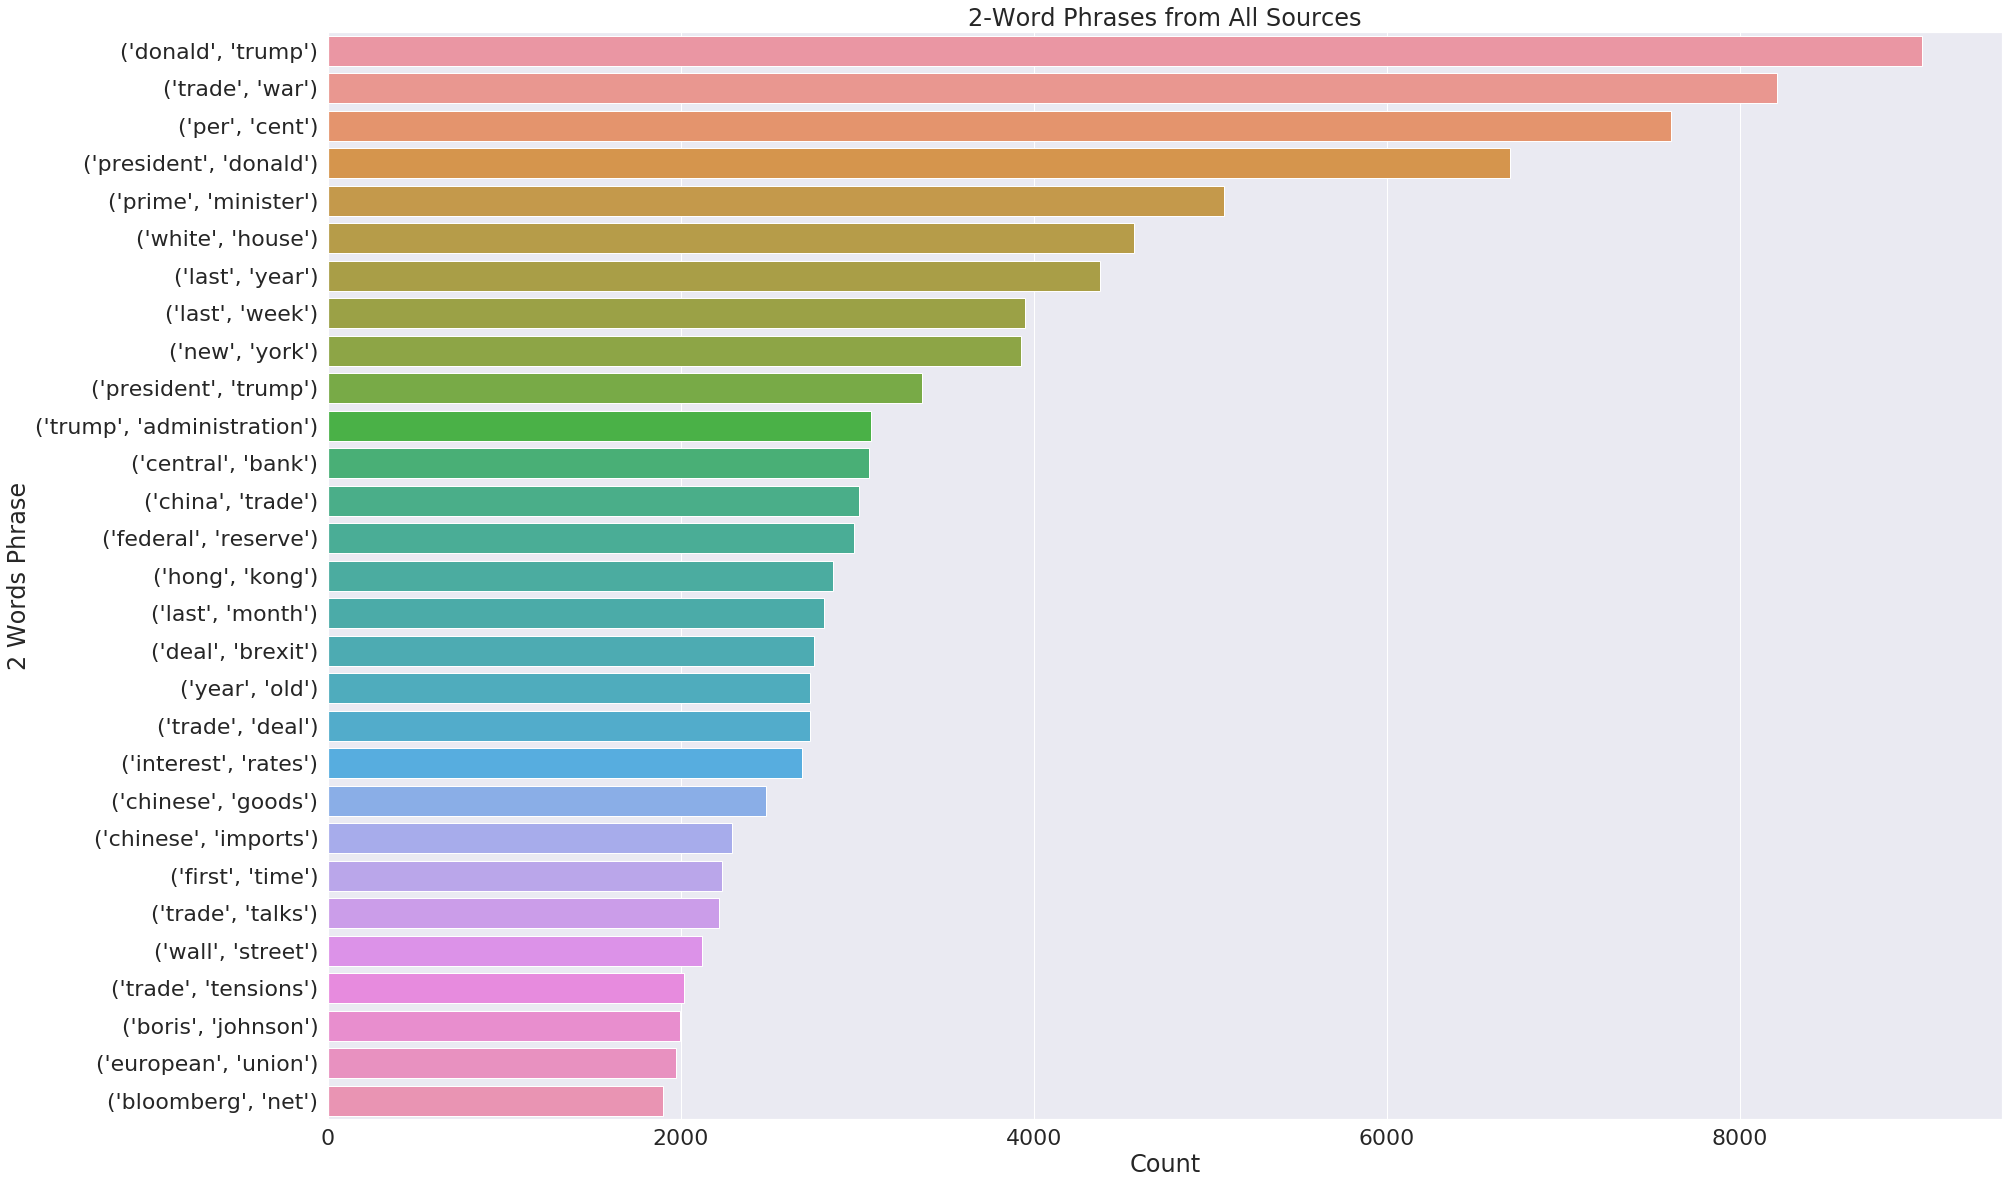

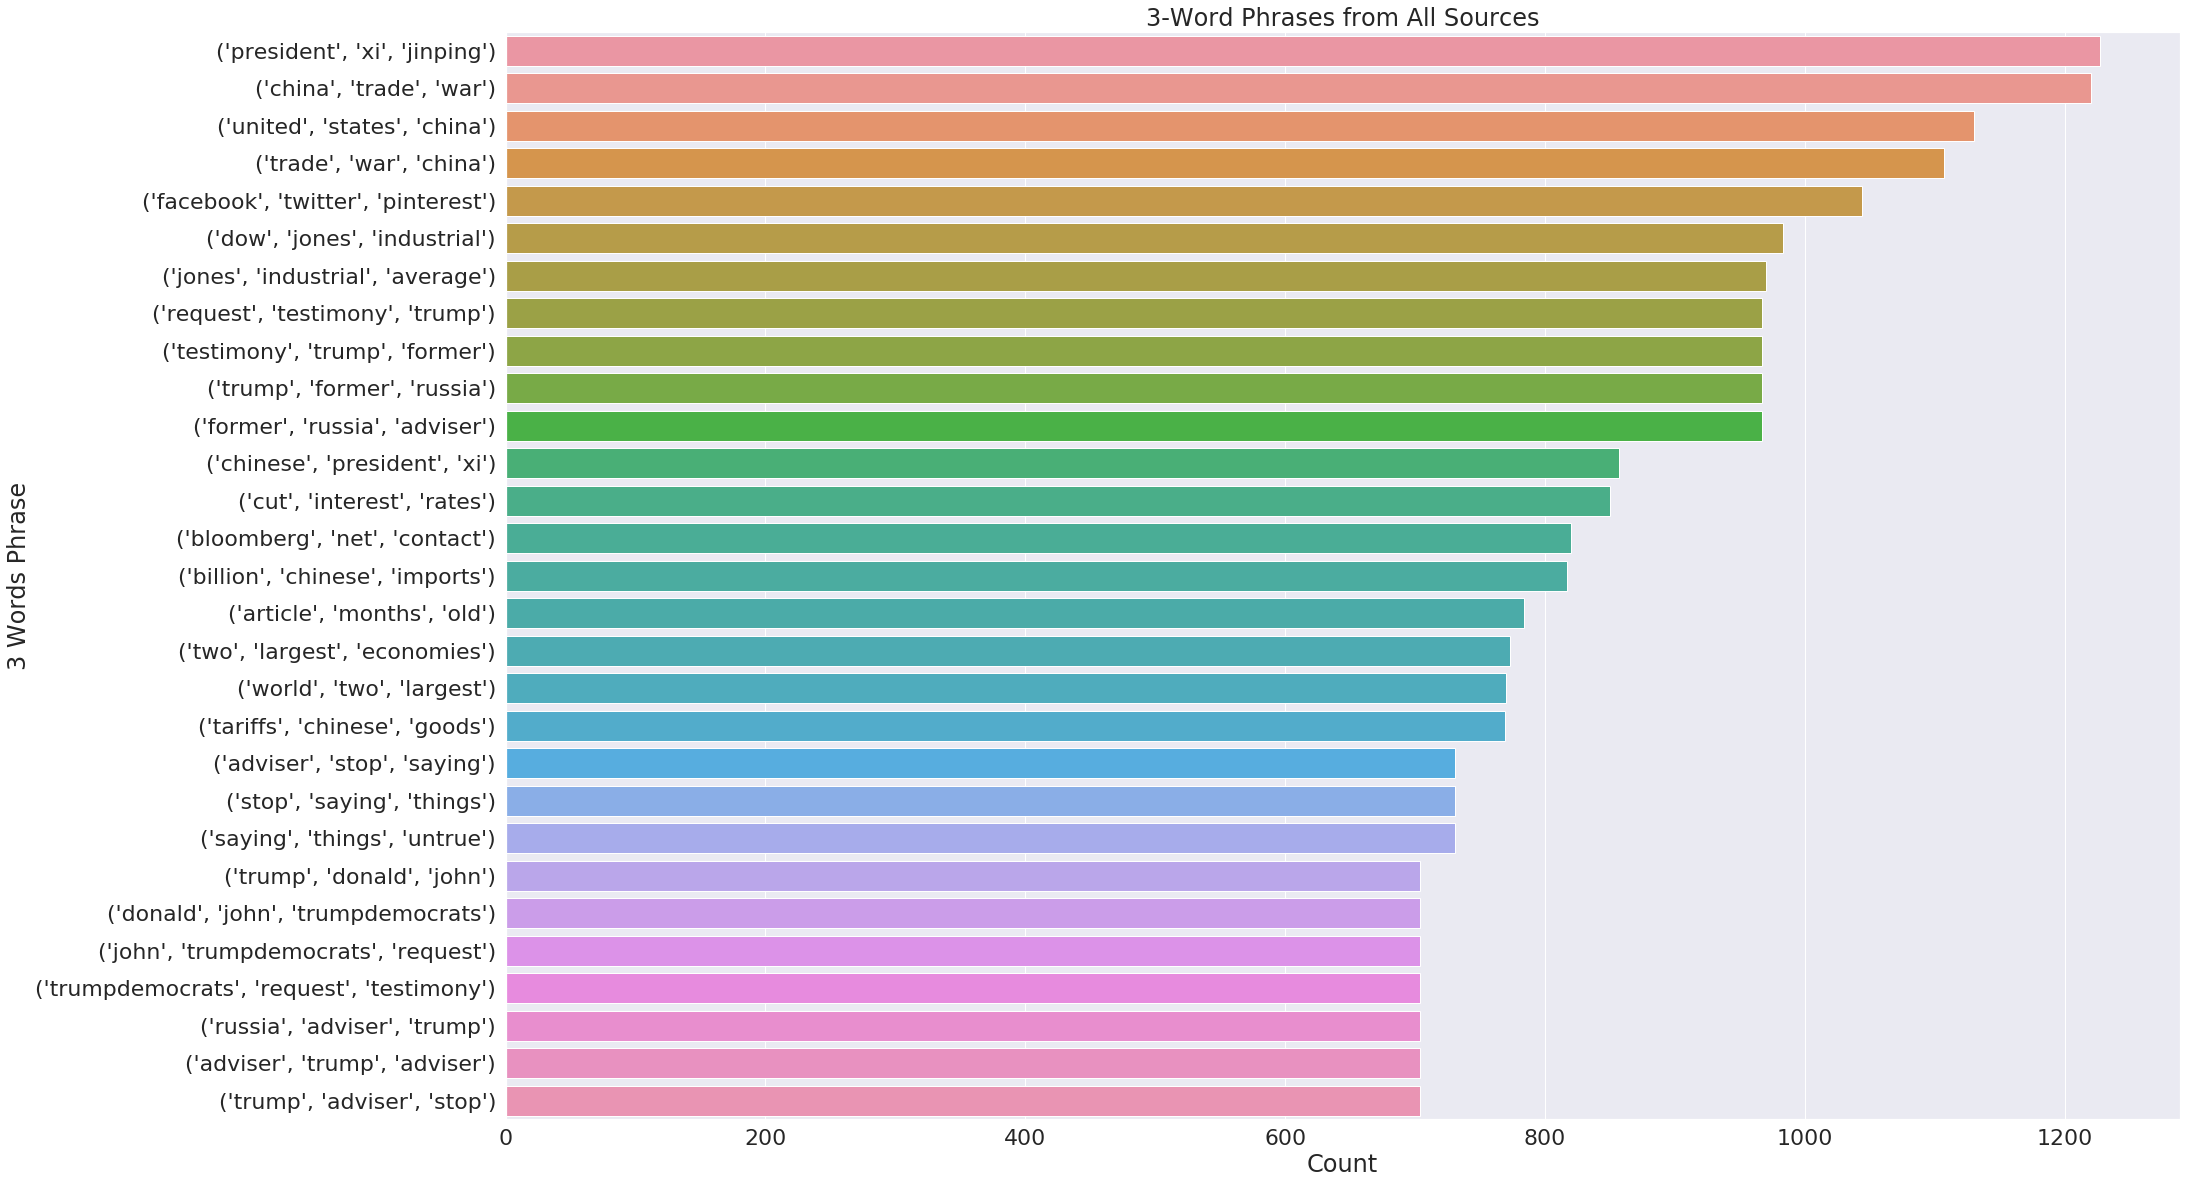

In [30]:
### All News
bi_tokens_all, tri_tokens_all = get_tokens(news_all)
bi_df_all, tri_df_all = get_word_phrases(bi_tokens_all, tri_tokens_all)
plot_bi_word_count(bi_df_all)
plot_tri_word_count(tri_df_all)


In [31]:
### Plot Top Phrases for Each Source
for source_name in all_data.source.unique():
  # Select one source:
  sub_df = all_data[all_data.source == source_name]
  
  #combine all news
  sub_news = " ".join(oneNews for oneNews in sub_df.text)
  
  bi_tokens_all, tri_tokens_all = get_tokens(sub_news)
  bi_df_all, tri_df_all = get_word_phrases(bi_tokens_all, tri_tokens_all)
  plot_bi_word_count(bi_df_all, plot_source = source_name)
  plot_tri_word_count(tri_df_all, plot_source = source_name)


Output hidden; open in https://colab.research.google.com to view.

In [0]:
bi = collections.OrderedDict(bi_tokens.most_common())
tri = collections.OrderedDict(tri_tokens.most_common())

bi_df = pd.DataFrame.from_dict(bi, orient='index').reset_index()
bi_df = bi_df.rename(columns={'index':'2 Words Phrase', 0:'Count'})

tri_df = pd.DataFrame.from_dict(tri, orient='index').reset_index()
tri_df = tri_df.rename(columns={'index':'3 Words Phrase', 0:'Count'})

In [0]:
bi_df.head(50)

,2 Words Phrase,Count
0,"(united, states)",10282
1,"(donald, trump)",9032
2,"(trade, war)",8208
3,"(per, cent)",7610
4,"(president, donald)",6699
5,"(prime, minister)",5074
6,"(white, house)",4568
7,"(last, year)",4374
8,"(last, week)",3948
9,"(new, york)",3924


In [0]:
tri_df.head(50)

,3 Words Phrase,Count
0,"(president, donald, trump)",6588
1,"(president, xi, jinping)",1227
2,"(china, trade, war)",1220
3,"(united, states, china)",1130
4,"(trade, war, china)",1107
5,"(facebook, twitter, pinterest)",1044
6,"(dow, jones, industrial)",983
7,"(jones, industrial, average)",970
8,"(request, testimony, trump)",967
9,"(testimony, trump, former)",967


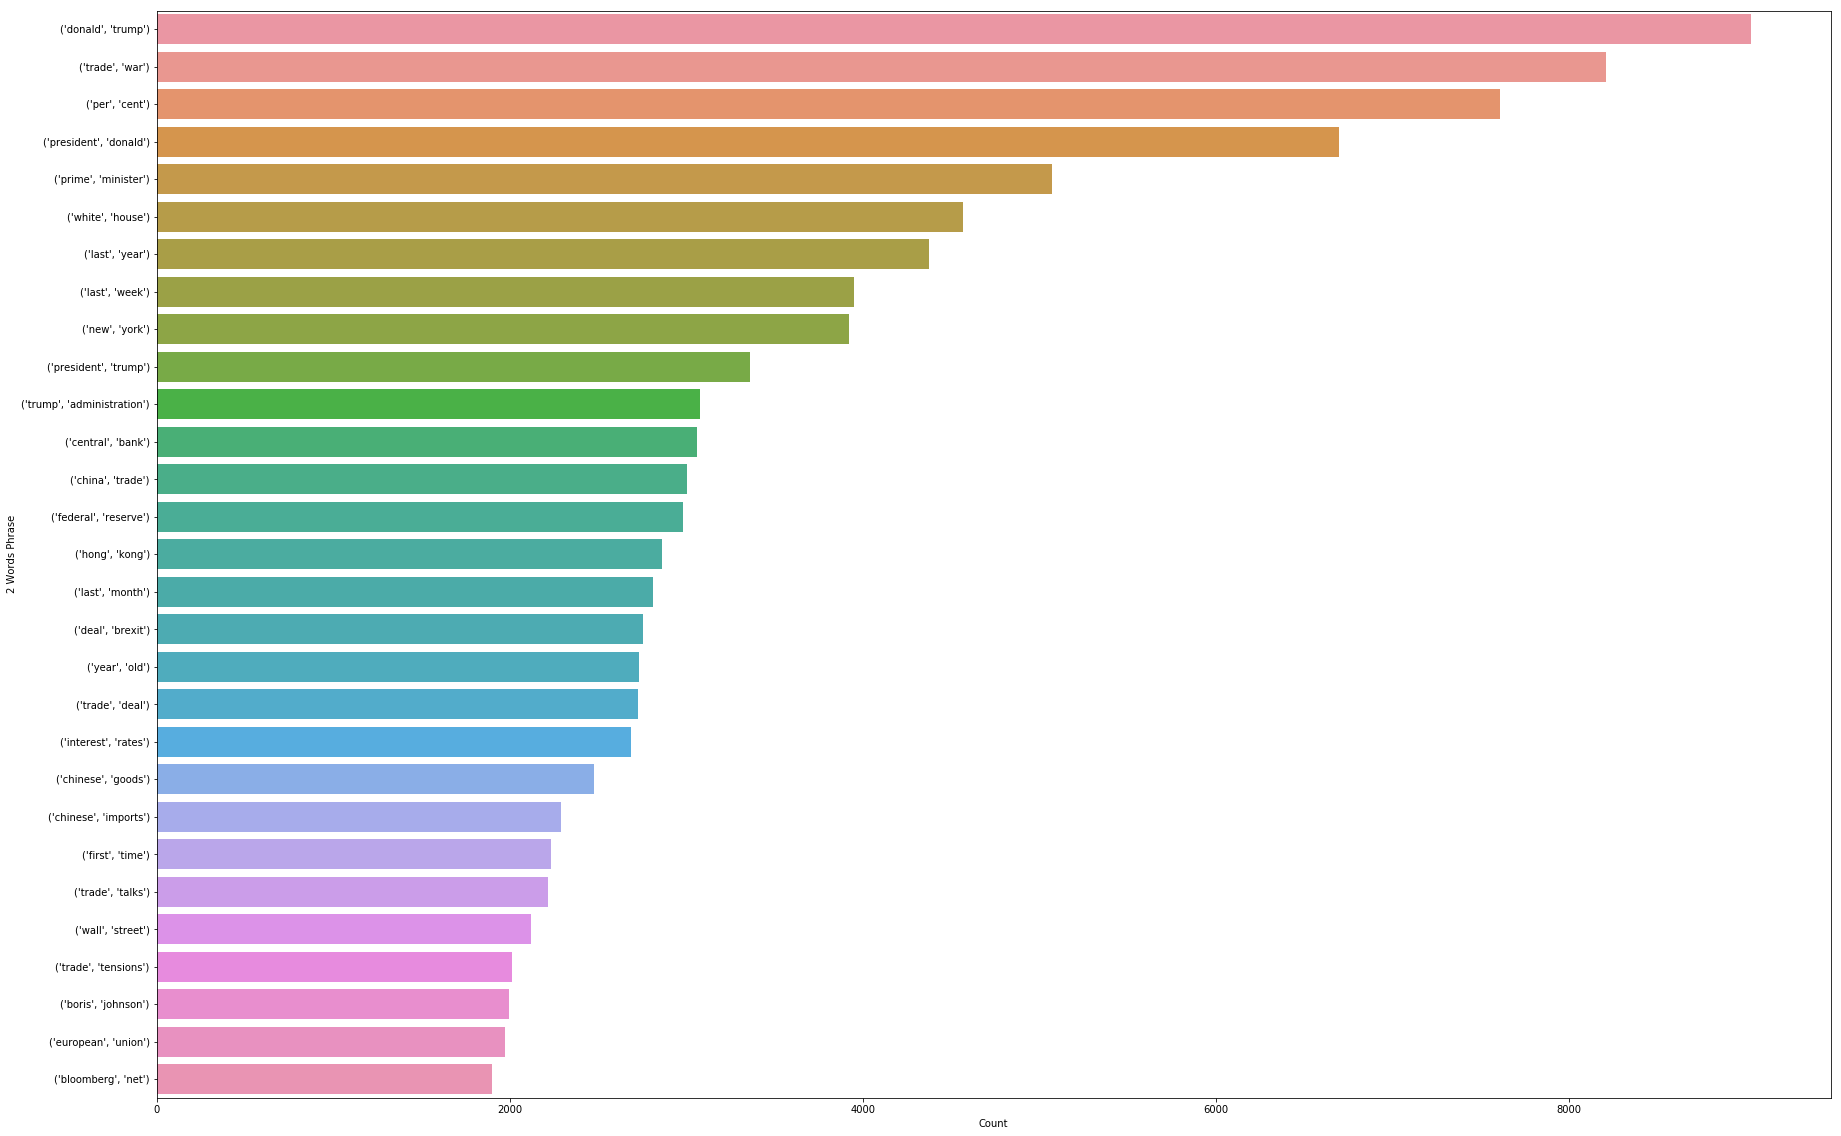

In [0]:
plt.figure(figsize = (30, 20))
sns.barplot(y = '2 Words Phrase', x = 'Count', data = bi_df.iloc[1:30])

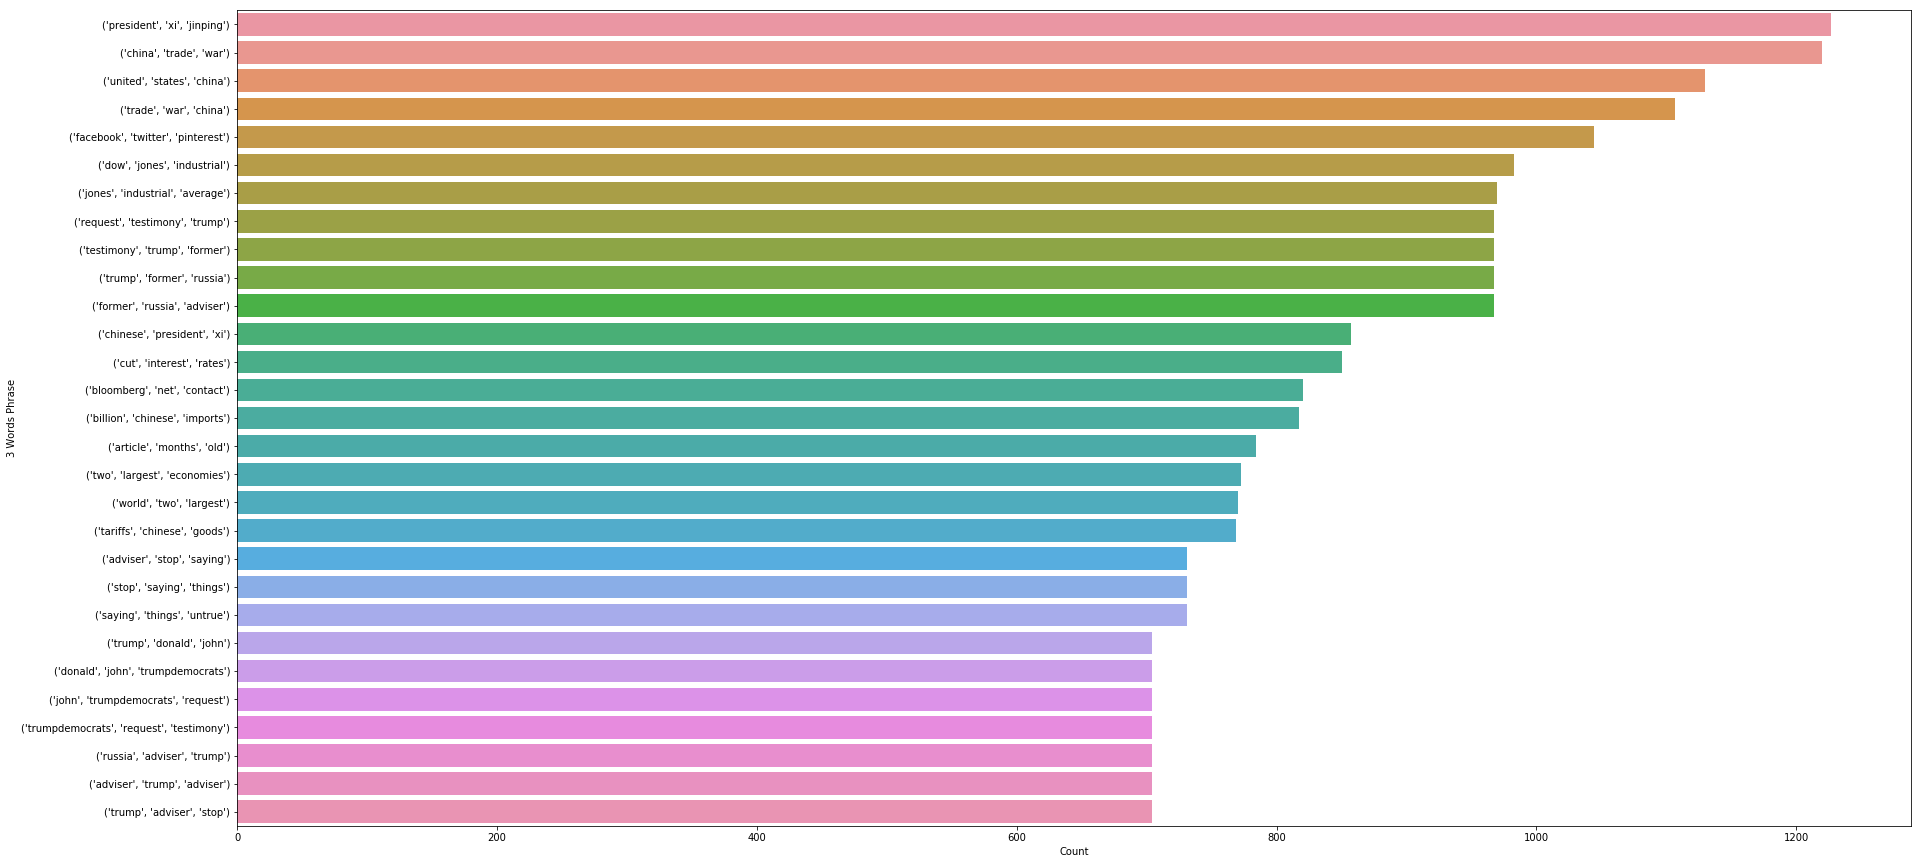

In [0]:
plt.figure(figsize = (30, 15))
sns.barplot(y = '3 Words Phrase', x = 'Count', data = tri_df.iloc[1:30])

In [0]:
news_all_remove_punc = news_all.translate(str.maketrans('', '', string.punctuation))


In [0]:
word_freq = {}
news_list = news_all.split()
for word in news_list:
  word_freq[word] = word_freq.setdefault(word, 0) + 1
word_freq

In [0]:
wordfreq_df = pd.Series(word_freq)
wordfreq_df.sort_values(ascending=False).head(100)